<a href="https://colab.research.google.com/github/msr0b0tjennica/customer-segmentation-clustering/blob/main/CustomerSegmentationUsingClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We attempt to group customers into distinct segments based on their purchase records.

We will use K-Means clustering algorithms.

We will use PCA (Prinicipal Component Analysis) to visualise the clusters

In [ ]:
#imporitng required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!pip install kneed

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from kneed import KneeLocator

In [ ]:
#load the dataset
df = pd.read_csv('/content/drive/MyDrive/Cluster Segmentation Customers/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print(df.isnull().sum())
print(df.describe())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


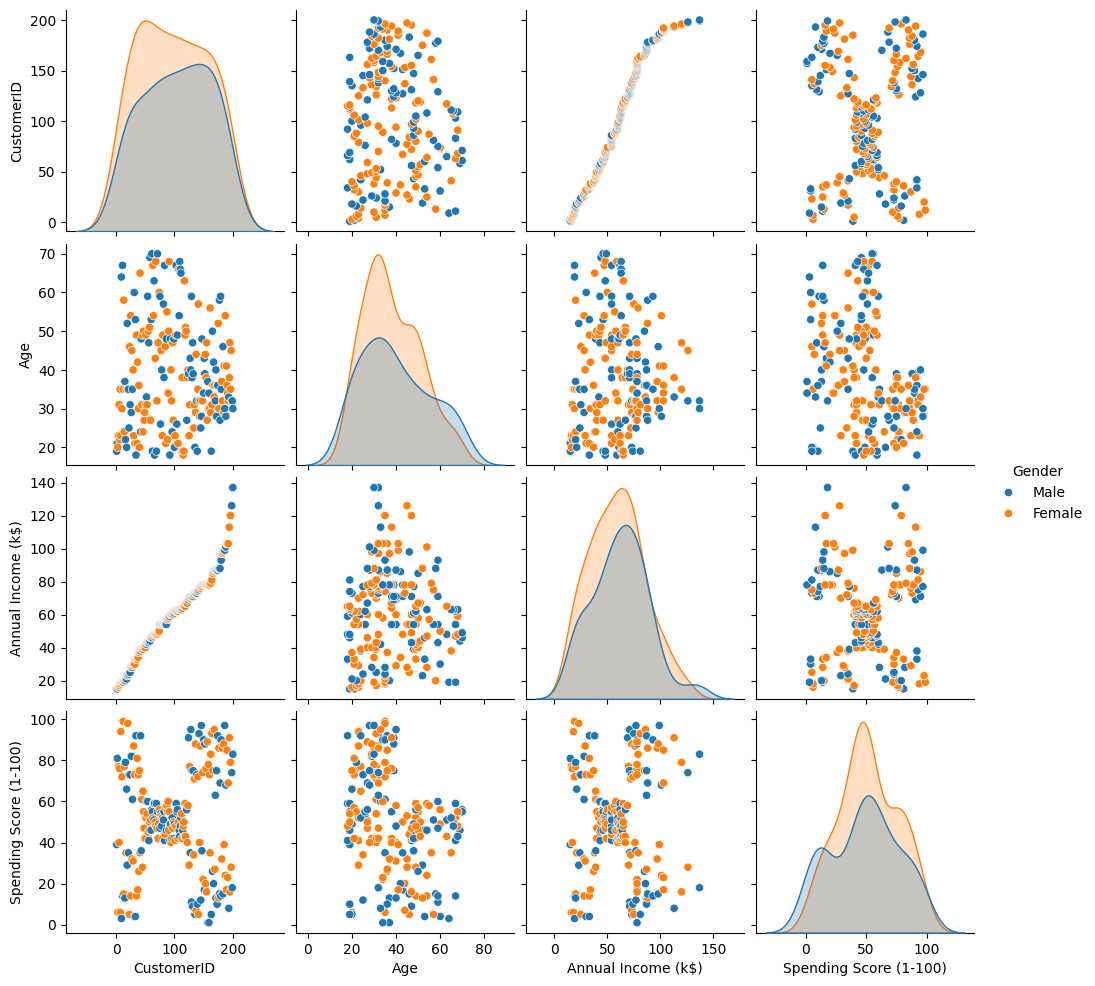

In [ ]:
#visualize the distribution
sns.pairplot(df, hue='Gender',diag_kind='kde')
plt.show()

In [ ]:
#Data prep
df = df.drop('CustomerID',axis=1)

df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
#using the elbow method to determine the optimal number of clusters

inertia = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  clusters = kmeans.fit(df_scaled)
  inertia.append(kmeans.inertia_)

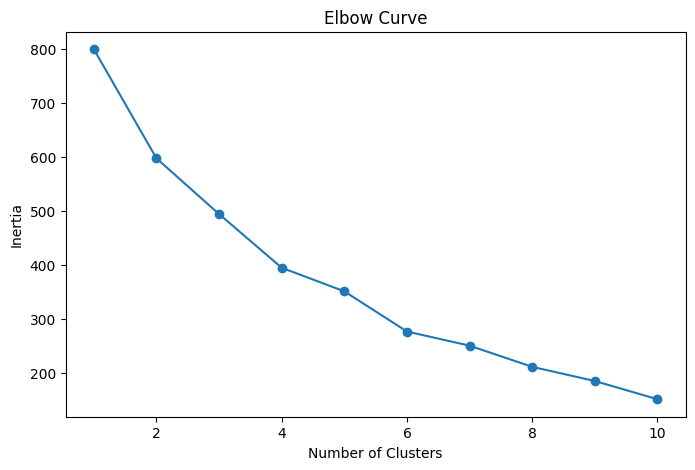

In [ ]:
#plotting the elbow curve
plt.figure(figsize=(8,5))
plt.plot(range(1,11),inertia,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [ ]:
#now we need to locate the elbow to find the optimal k
knee_locator = KneeLocator(
    range(1,11),
    inertia,
    curve='convex',
    direction='decreasing'
)

optimal_k = knee_locator.elbow
print(f'Optimal number of clusters: {optimal_k}')

Optimal number of clusters: 6


In [ ]:
#now let's apply k-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

df['Cluster'] = clusters

In [ ]:
#to visulaise the clusters, we are applying PCA
#PCA transforms high-dimensional data into lower-dimensional space while preserving as much variance as possible

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(df_pca, columns=['PC1','PC2'])
df_pca['Cluster'] = clusters


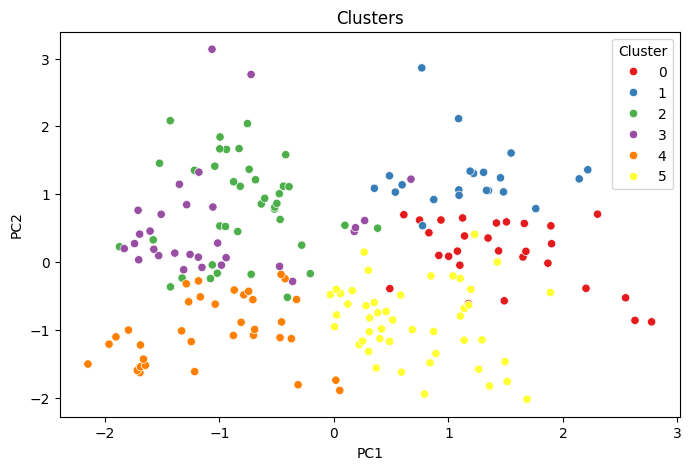

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.title('Clusters')
plt.show()


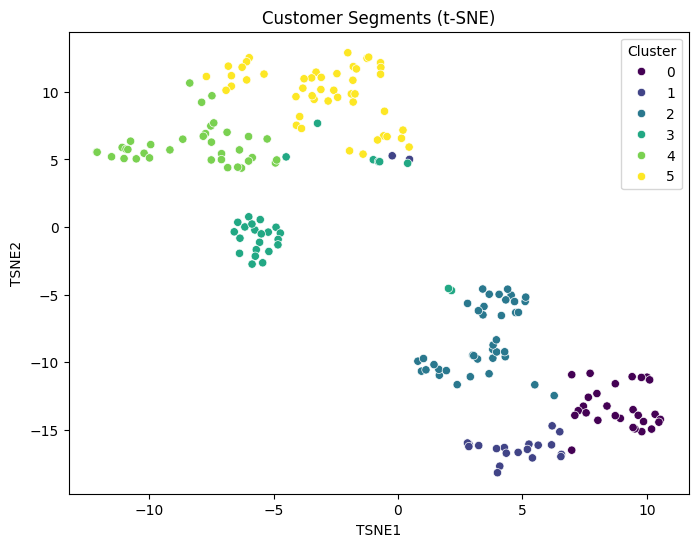

In [ ]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_scaled)

# Create a DataFrame for visualization
df_tsne = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
df_tsne['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=df_tsne, palette='viridis')
plt.title('Customer Segments (t-SNE)')
plt.show()

In [ ]:
# Group by cluster and analyze
cluster_analysis = df_pca.groupby('Cluster').mean()
print(cluster_analysis)

              PC1       PC2
Cluster                    
0        1.480433  0.122208
1        1.174259  1.253738
2       -0.797682  0.799086
3       -1.045824  0.551452
4       -1.049602 -0.991413
5        0.704524 -0.876934
